# Analisi Dati: Efficientamento Energetico
<img src="https://www.pozzicase.it/sites/default/files/styles/immagine_wide_blocco_a/public/casa/main.jpg?itok=jVvRVwpp" width="700">

Abbiamo trovato [qui](https://search.r-project.org/CRAN/refmans/MPV/html/gasdata.html) dei dati riguardo al consumo di gas una casa, la cui descrizione è la seguente:

_"This data frame contains the average monthly volume of natural gas used in the furnace of a 1600 square foot house located in London, Ontario, for each month from 2006 until 2011. It also contains the average temperature for each month, and a measure of degree days. Insulation was added to the roof on one occasions, the walls were insulated on a second occasion, and the mid-efficiency furnace was replaced with a high-efficiency furnace on a third occasion."_

Sembra interessante! Forse questi dati ci aiuteranno a capire se vale la pena investire nell'efficientamento energetico di una casa.

In [27]:
# Prima di tutto carichiamo le librerie necessarie
import numpy as np
import pandas as pd
import urllib.request
import os
import matplotlib.pyplot as plt

In [19]:
# Qualche funzione utile

def download(url, filename):
    os.makedirs('dati', exist_ok=True)
    if not os.path.exists(filename):
        print('Sto scaricando ' + filename + ' ...')
        urllib.request.urlretrieve(url, 'dati/dataset.csv')
        print('fatto!')
    else:
        print('File ' + filename + ' già scaricato.')

Prima di tutto, dobbiamo scaricare i dati e vedere di cosa si tratta

In [20]:
# Ora scarichiamo i dati
LINK = 'https://www.dropbox.com/scl/fi/plnv6zacnm5i463hswdsk/gasdata.csv?rlkey=21zubn1z3g004y4rtupljx3g9&dl=1'
download(LINK, 'dati/dataset.csv')

Sto scaricando dati/dataset.csv...
fatto!


In [21]:
# I dati sono stati scaricati in una cartella chiamata 'dati' e il file si chiama 'dataset.csv', ora li possiamo caricare con pandas
df = pd.read_csv('dati/dataset.csv')

Bene, ora che abbiamo caricato il dataset, possiamo vedere quali colonne ha la nostra tabella.

In [60]:
df

,month,cubicmetres,dailyusage,temp,year,roof_insulation,wall_insulation,high_efficiency_furnace
0,July,27.9,0.9,18.0,2005,0,0,0
1,August,18.6,0.6,17.0,2005,0,0,0
2,September,22.4,0.7,17.0,2005,0,0,0
3,October,153.6,4.8,12.0,2005,0,0,0
4,November,316.1,10.9,6.0,2005,0,0,0
...,...,...,...,...,...,...,...,...
65,December,361.5,11.3,-2.0,2010,1,1,1
66,January,423.1,13.6,-6.0,2011,1,1,1
67,February,449.9,15.5,-7.0,2011,1,1,1
68,March,376.4,11.8,-2.0,2011,1,1,1


La tabella sembra corrispondere alla descrizione:
- Ogni riga contiene delle misurazioni riguardanti un certo mese dell'anno, apparentemente da Luglio 2005 ad Aprile 2011. In totale abbiamo 70 righe (osservazioni)
- Per ogni mese sappiamo il consumo totale di gas in metri cubi (cubicmetres), la media giornaliera (dailyusage) e la temperatura esterna (temp)
- Le ultime 3 colonne invece ci dicono che tipo di intervento di efficientamento energetico è stato fatto (roof_insulation, wall_insulation, high_efficiency_furnace). Queste colonne non contengono veramente dei numeri, hanno solo due opzioni: '0' e '1' che indicano se la casa ha (1) o no (0) la caratteristica indicata dalla colonna. 

Meglio dailyusage o cubicmeters?

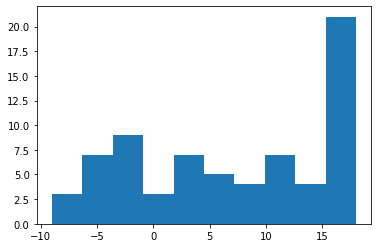

In [52]:
_ = plt.hist(df['temp'])

In [55]:
df.describe()

,cubicmetres,dailyusage,temp,year,roof_insulation,wall_insulation,high_efficiency_furnace
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,245.964286,8.417143,7.330000,2007.914286,0.428571,0.200000,0.085714
std,207.088681,7.120637,8.674122,1.742419,0.498445,0.402888,0.281963
min,8.500000,0.500000,-9.000000,2005.000000,0.000000,0.000000,0.000000
25%,42.175000,1.400000,-1.000000,2006.250000,0.000000,0.000000,0.000000
50%,192.850000,6.650000,8.050000,2008.000000,0.000000,0.000000,0.000000
75%,417.375000,14.650000,16.000000,2009.000000,1.000000,0.000000,0.000000
max,738.000000,24.600000,18.000000,2011.000000,1.000000,1.000000,1.000000


In [ ]:
# Quanto sono stati utili gli efficientamenti energetici?
    # vediamo che dati abbiamo a disposizione
        # quali
        # quanti
        
    # vedere consumo annuo prima/dopo?
        # quanti anni abbiamo?
        # sommare per anno?
        # confrontare mese per mese?
        
    # vedere consumo annuo prima/dopo?
        # quanti anni abbiamo?
        # sommare per anno?
        # confrontare mese per mese?
        
    # Possiamo predire il consumo di gas?
        # senza considerare l'efficientamento
        # considerando l'efficientamento